In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
from netCDF4 import Dataset # to work with NetCDF files

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [ ]:
## This is the method we use to get around memory issues. To implement, use:
## dask-scheduler # get the tcp code from this call in a jupyter new terminal, then run command below in a another terminal
## dask-worker tcp://10.0.64.9:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/v45/pas561
client=Client('tcp://10.0.64.24:8786', local_dir='/local/v45/pas561')
client

/g/data1/v45/pas561/access-om2_amoc/om2_01_amoc_mask_newdims.nc
(1, 2700, 3600)
(2700, 3600)


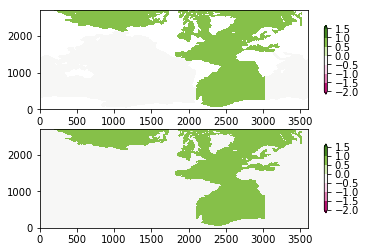

In [2]:
NYFCntrlDir = '/g/data1/v45/pas561/access-om2_amoc/'

Ocean_File = os.path.join(NYFCntrlDir,'om2_01_amoc_mask_newdims.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.kmu.shape)
mask=cntrl.kmu[0].load()

plt.subplot(211)
clev = np.arange(-2,2,0.5)
plt.contourf(mask,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)

print(mask.shape)
#print(mask[250,:])

mask=np.nan_to_num(mask)
#print(mask[250,:])

plt.subplot(212)
clev = np.arange(-2,2,0.5)
plt.contourf(mask,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)

#mask2=mask.sel(xt_ocean=slice(-80,50)).sel(yu_ocean=slice(-35,70))


/g/data1/v45/pas561/access-om2_amoc/om2_01_amoc_mask_newdims.nc
(1, 2700, 3600)
(1356, 1300)


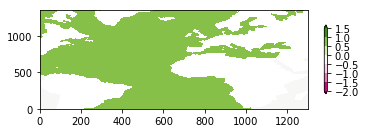

In [3]:
NYFCntrlDir = '/g/data1/v45/pas561/access-om2_amoc/'

Ocean_File = os.path.join(NYFCntrlDir,'om2_01_amoc_mask_newdims.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.kmu.shape)

mask2=cntrl.kmu[0].sel(grid_xt_ocean=slice(-80,50)).sel(grid_yu_ocean=slice(-35,70)).load()

print(mask2.shape)

plt.subplot(212)
clev = np.arange(-2,2,0.5)
plt.contourf(mask2,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)


In [ ]:
NYFPertDir = '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/'

Ocean_File = os.path.join(NYFPertDir,'output*/ocean/ocean.nc')
print(Ocean_File)
#pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
pert=xr.open_mfdataset(Ocean_File, concat_dim='time', decode_times=False, preprocess=lambda d: d['ty_trans'].to_dataset())


print(pert.ty_trans.shape)

#for some reason the 180to189 files won't load while 0to99 will???

##pert_gmoc=np.zeros((pert.ty_trans_rho.shape[0],pert.ty_trans_rho.shape[1],pert.ty_trans_rho.shape[2]))
#pert_gmoc=np.zeros((22,1364,1463))#pert.ty_trans_rho.shape[1],pert.ty_trans_rho.shape[2]))
#print(pert_gmoc.shape)
##pert_gmoc[0:78,:,:]=pert_gmoc2

In [ ]:
pert_gmoc=np.zeros((pert.ty_trans.shape[0],75,2700))#1364))#pert.ty_trans_rho.shape[1],pert.ty_trans_rho.shape[2]))
print(pert_gmoc.shape)

for t in range(0,pert.ty_trans.shape[0]): #pert.ty_trans_rho.shape[0]):
    print(t)
    #pert_gmoc[t,:,:]=pert.ty_trans_rho[t,:,:,:].sum('grid_xt_ocean').cumsum('potrho')*mask
    #tmp=pert.ty_trans[t,:,868:2232,1787:3250]*mask[868:2232,1787:3250]
    tmp=pert.ty_trans[t,:,:,:]*mask
    print(tmp.shape)
    pert_gmoc[t,:,:]=tmp.sum(axis=2).cumsum(axis=0)*1.0e-9 -tmp.sum(axis=2).sum(axis=0)*1.0e-9

print(pert_gmoc.shape)
a=np.save('01_amoc_adv_z_01_t0to197.npy',pert_gmoc)

In [4]:
NYFPertDir = '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/'
Ocean_File = os.path.join(NYFPertDir,'output0[6-9]*/ocean/ocean.nc')
pert=xr.open_mfdataset(Ocean_File, concat_dim='time', decode_times=False, preprocess=lambda d: d['ty_trans_rho'].to_dataset())

print(pert.ty_trans_rho.shape)

pert_gmoc=np.zeros((pert.ty_trans_rho.shape[0],pert.ty_trans_rho.shape[1],pert.ty_trans_rho.shape[2]))
print(pert_gmoc.shape)

for t in range(0,pert.ty_trans_rho.shape[0]):
    print(t)
    tmp=pert.ty_trans_rho[t,:,:,:]*mask
    print(tmp.shape)
    pert_gmoc[t,:,:]=tmp.sum(axis=2).cumsum(axis=0)*1.0e-9 -tmp.sum(axis=2).sum(axis=0)*1.0e-9

print(pert_gmoc.shape)
a=np.save('01_amoc_adv_rho_01_t60to99.npy',pert_gmoc)


(80, 80, 2700, 3600)
(80, 80, 2700)
0
(80, 2700, 3600)
1
(80, 2700, 3600)
2
(80, 2700, 3600)
3
(80, 2700, 3600)
4
(80, 2700, 3600)
5
(80, 2700, 3600)
6
(80, 2700, 3600)
7
(80, 2700, 3600)
8
(80, 2700, 3600)
9
(80, 2700, 3600)
10
(80, 2700, 3600)
11
(80, 2700, 3600)
12
(80, 2700, 3600)
13
(80, 2700, 3600)
14
(80, 2700, 3600)
15
(80, 2700, 3600)
16
(80, 2700, 3600)
17
(80, 2700, 3600)
18
(80, 2700, 3600)
19
(80, 2700, 3600)
20
(80, 2700, 3600)
21
(80, 2700, 3600)
22
(80, 2700, 3600)
23
(80, 2700, 3600)
24
(80, 2700, 3600)
25
(80, 2700, 3600)
26
(80, 2700, 3600)
27
(80, 2700, 3600)
28
(80, 2700, 3600)
29
(80, 2700, 3600)
30
(80, 2700, 3600)
31
(80, 2700, 3600)
32
(80, 2700, 3600)
33
(80, 2700, 3600)
34
(80, 2700, 3600)
35
(80, 2700, 3600)
36
(80, 2700, 3600)
37
(80, 2700, 3600)
38
(80, 2700, 3600)
39
(80, 2700, 3600)
40
(80, 2700, 3600)
41
(80, 2700, 3600)
42
(80, 2700, 3600)
43
(80, 2700, 3600)
44
(80, 2700, 3600)
45
(80, 2700, 3600)
46
(80, 2700, 3600)
47
(80, 2700, 3600)
48
(80, 2700, 

In [ ]:
#years
#0to4 yr1 - 3 months per
#05-197 - 2 months per

In [2]:
nc = Dataset('/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/output001/ocean/ocean.nc', mode='r') # file handle, open in read only mode
st_ocean = nc.variables['st_ocean'][:]
potrho = nc.variables['potrho'][:]
yu_ocean = nc.variables['yu_ocean'][:]
nc.close() # close the file
print(potrho.shape)
print(yu_ocean.shape)

(80,)
(2700,)


In [ ]:
amoc=np.load('01_amoc_adv_rho_01_t19.npy')
print(amoc.shape)
gmoc=np.load('01_gmoc_adv_rho_01_t19.npy')
print(gmoc.shape)

#these have the -tmp.sum(axis=2).sum(axis=0)*1.0e-9 correction, the above do not.
amocv2=np.load('01_amoc_adv_rho_01_t19v2.npy')
print(amoc.shape)
gmocv2=np.load('01_gmoc_adv_rho_01_t19v2.npy')
print(gmoc.shape)

In [ ]:
clev = np.arange(-10,10,1)
plt.subplot(221)
plt.contourf(yu_ocean,potrho,amoc[4:16,:,:].mean(axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,70])
plt.title('AMOC')

plt.subplot(222)
plt.contourf(yu_ocean,potrho,gmoc[4:16,:,:].mean(axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,70])
plt.title('GMOC')

plt.subplot(223)
plt.contourf(yu_ocean,potrho,amocv2[4:16,:,:].mean(axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,70])
plt.title('AMOCv2')

plt.subplot(224)
plt.contourf(yu_ocean,potrho,gmocv2[4:16,:,:].mean(axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,70])
plt.title('GMOCv2')

In [ ]:
expt = '01deg_jra55v13_iaf'
n_files = None                          ## For Testing
time_units = 'days since 0001-01-01'   ## These are to give correct dates
offset = None

psi = cc.get_nc_variable(expt,'ocean.nc','ty_trans_rho',
                                        n=n_files,time_units=time_units, offset=offset)
#float ty_trans_rho(time, potrho, grid_yu_ocean, grid_xt_ocean) ;
psi = psi.sel(grid_xt_ocean=slice(-80,50)).sel(grid_yu_ocean=slice(-35,70)).resample(time='A').mean('time')

#psi = psi.resample(time='A').mean('time')

print(psi.shape)

psi=psi*mask2

print(psi.shape)


print(' ------ Here is what the initial dataset looks like ------ ')
print(psi)
print(' --------------------------------------------------------- ')
print(' ')

psi = psi.sum('grid_xt_ocean')*1.0e-9
psi = psi.cumsum('potrho') -  psi.sum('potrho')


#print(' ------ Here is what the resampled dataset looks like ------ ')
#print(' --------------------------------------------------------- ')
#print(' ')

## Plot the mean for the North Atlantic region
#psi.mean('time').plot.contourf(levels=np.arange(-29,30,2))

#of=os.path.join('amoc01.npy')
#a=np.save(of,psi)

print(psi.shape)

## Save the whole dataset
#psi.to_netcdf('AMOC_rho_adv_01deg.nc')

In [ ]:
psi2 = psi[0,:,:]
print(psi2.shape)

## Plot the mean for the North Atlantic region
psi2.plot.contourf(levels=np.arange(-29,30,2))


In [ ]:
psi2.to_netcdf('AMOC_rho_adv_01deg_t5.nc')

#of=os.path.join('amoc01.npy')
#a=np.save('amoc01_v1.npy',psi[0:10,:,:])

In [ ]:
#psi.mean('time').plot.contourf(levels=np.arange(-29,30,2))

## Save the whole dataset


In [11]:
amoc_z=np.load('01_amoc_adv_z_01_t0to197.npy')
print(amoc_z.shape)
print(potrho.shape,yu_ocean.shape,st_ocean.shape)


(396, 75, 2700)
(80,) (2700,) (75,)


In [9]:
amoc_r1=np.load('01_amoc_adv_rho_01_t0to59.npy')
print(amoc_r1.shape)
amoc_r2=np.load('01_amoc_adv_rho_01_t60to99.npy')
print(amoc_r2.shape)
amoc_r3=np.load('01_amoc_adv_rho_01_t100to159.npy')
print(amoc_r3.shape)
amoc_r4=np.load('01_amoc_adv_rho_01_t160to197.npy')
print(amoc_r4.shape)


amoc_r=np.concatenate((amoc_r1, amoc_r2,amoc_r3,amoc_r4), axis=0)
print(amoc_r.shape)

(120, 80, 2700)
(80, 80, 2700)
(120, 80, 2700)
(76, 80, 2700)
(396, 80, 2700)


In [19]:
#create and write netcdf file
rootgrp = Dataset("amoc_transport_01.nc", "w")

#float amoc_gm_rho(time, potrho, grid_yu_ocean) ;
t = rootgrp.createDimension("time", None)
rho = rootgrp.createDimension("potrho", 80)
yu = rootgrp.createDimension("yu_ocean", 2700)
st = rootgrp.createDimension("st_ocean", 75)

times= rootgrp.createVariable("time","f8",("time",))
potrhos= rootgrp.createVariable("potrho","f8",("potrho",))
yu_oceans= rootgrp.createVariable("yu_ocean","f8",("yu_ocean",))
st_oceans= rootgrp.createVariable("st_ocean","f8",("st_ocean",))

#temp = tempgrp.createVariable('Temperature', 'f4', ('time', 'lon', 'lat', 'z'))
amoc_adv_z= rootgrp.createVariable("amoc_adv_z","f8",("time","st_ocean","yu_ocean",))
amoc_adv_rho= rootgrp.createVariable("amoc_adv_rho","f8",("time","potrho","yu_ocean",))


potrhos[:]=potrho
st_oceans[:]=st_ocean
yu_oceans[:]=yu_ocean
amoc_adv_z[:]=amoc_z
amoc_adv_rho[:]=amoc_r


rootgrp.close()


(80,)
(2700,)
(1, 75, 2700)


Text(0.5,1,'AMOC')

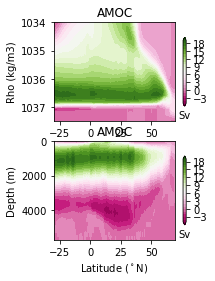

In [10]:
nc = Dataset('/g/data1/v45/pas561/access-om2_amoc/amoc_transport_01.ncra.nc', mode='r') # file handle, open in read only mode
st_ocean = nc.variables['st_ocean'][:]
potrho = nc.variables['potrho'][:]
yu_ocean = nc.variables['yu_ocean'][:]
amoc_z = nc.variables['amoc_adv_z'][:]
amoc_r = nc.variables['amoc_adv_rho'][:]
nc.close() # close the file
print(potrho.shape)
print(yu_ocean.shape)
print(amoc_z.shape)

clev = np.arange(-5,20,1)
plt.subplot(221)
plt.contourf(yu_ocean,potrho,amoc_r[0,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Rho (kg/m3)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,70])
plt.title('AMOC')

plt.subplot(223)
plt.contourf(yu_ocean,st_ocean,amoc_z[0,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,70])
plt.title('AMOC')



(75, 2700)
(80,)
(300,)
(60, 50, 300)
(50, 300)
(75,) (2700,) (75, 2700)
(50, 300)


Text(0.5,1,'AMOC 01 minus 1 deg')

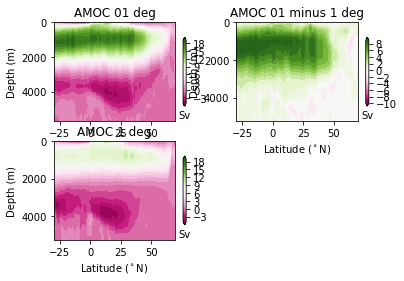

In [11]:
#interp AMOC onto common grid to make difference plot
#between 1 deg and 01 deg
amoc_z=amoc_z[0,:,:]
print(amoc_z.shape)

nc = Dataset('/g/data1/v45/pas561/access-om2_amoc/AMOC_1deg.nc', mode='r') # file handle, open in read only mode
st_ocean_1 = nc.variables['st_ocean'][:]
potrho_1 = nc.variables['potrho'][:]
yu_ocean_1 = nc.variables['yu_ocean'][:]
amoc_z_1 = nc.variables['amoc_adv_z'][:]
nc.close() # close the file
print(potrho_1.shape)
print(yu_ocean_1.shape)
print(amoc_z_1.shape)
amoc_z_1=amoc_z_1.mean(axis=0)
print(amoc_z_1.shape)

plt.subplot(221)
plt.contourf(yu_ocean,st_ocean,amoc_z[:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,70])
plt.title('AMOC 01 deg')

plt.subplot(223)
plt.contourf(yu_ocean_1,st_ocean_1,amoc_z_1,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,70])
plt.title('AMOC 1 deg')

########## for 1D lat/long coords, can change degree of kx for improved fit if needed:
print(st_ocean.shape,yu_ocean.shape,amoc_z.shape)
from scipy.interpolate import RectBivariateSpline
f = RectBivariateSpline(st_ocean,yu_ocean,amoc_z,kx=1,ky=1)
amoc01_interp = f(st_ocean_1,yu_ocean_1)
print(amoc01_interp.shape)
## I found I needed this to mask a bunch of NaNs after:
#woa_zavg75_interp  = np.ma.masked_invalid(woa_zavg75_interp)
#print woa_zavg75_interp.shape


clev = np.arange(-10,10,1)
plt.subplot(222)
plt.contourf(yu_ocean_1,st_ocean_1,amoc01_interp-amoc_z_1,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,70])
plt.title('AMOC 01 minus 1 deg')

In [12]:
#create and write netcdf file
rootgrp = Dataset("amoc_transport_01minus1.1deg_grid.nc", "w")

#float amoc_gm_rho(time, potrho, grid_yu_ocean) ;
t = rootgrp.createDimension("time", None)
#rho = rootgrp.createDimension("potrho", 80)
yu = rootgrp.createDimension("yu_ocean", 300)
st = rootgrp.createDimension("st_ocean", 50)

#times= rootgrp.createVariable("time","f8",("time",))
#potrhos= rootgrp.createVariable("potrho","f8",("potrho",))
yu_oceans= rootgrp.createVariable("yu_ocean","f8",("yu_ocean",))
st_oceans= rootgrp.createVariable("st_ocean","f8",("st_ocean",))

#temp = tempgrp.createVariable('Temperature', 'f4', ('time', 'lon', 'lat', 'z'))
amoc_adv_z_diff= rootgrp.createVariable("amoc_adv_z 01 minus 1","f8",("st_ocean","yu_ocean",))
#amoc_adv_rho= rootgrp.createVariable("amoc_adv_rho","f8",("time","potrho","yu_ocean",))


#potrhos[:]=potrho
st_oceans[:]=st_ocean_1
yu_oceans[:]=yu_ocean_1
amoc_adv_z_diff[:]=amoc01_interp-amoc_z_1
#amoc_adv_rho[:]=amoc_r


rootgrp.close()
